In [1]:
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
import time
from matplotlib import pyplot as plt
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

done = True
for step in range(5000):
    if done:
        state = env.reset()
    state, reward, done, info = env.step(env.action_space.sample())
    time.sleep(0.01)
    env.render()

env.close()

{'coins': 0, 'flag_get': False, 'life': 2, 'score': 0, 'stage': 1, 'status': 'small', 'time': 400, 'world': 1, 'x_pos': 40, 'x_pos_screen': 40, 'y_pos': 79}
{'coins': 0, 'flag_get': False, 'life': 2, 'score': 0, 'stage': 1, 'status': 'small', 'time': 400, 'world': 1, 'x_pos': 40, 'x_pos_screen': 40, 'y_pos': 79}


D:\Programs\anaconda\envs\cudapy37\lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] 无法在设置线程模式后对其加以更改。
  warnings.warn(str(err))


In [3]:
print(env.action_space)

#env = gym_super_mario_bros.make('SuperMarioBros-v0',apply_api_compatibility=True,render_mode="human")


Discrete(7)


In [ ]:
env = gym_super_mario_bros.make('SuperMarioBros-v0',apply_api_compatibility=True,render_mode="human")

In [2]:
import gym
print(gym.__version__)

0.21.0


In [1]:
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
import time
from matplotlib import pyplot as plt
from stable_baselines3 import PPO
import torch
#from gym wrappers import GrayScaleObservation

if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'

env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)
#env = GrayScaleObservation(env)

tensorboard_log=r'./tensorboard_log/'

model = PPO("CnnPolicy", env, verbose=1, tensorboard_log=tensorboard_log)
model.learn(total_timesteps=30000)
model.save("mario_model")


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
Logging to ./tensorboard_log/PPO_1


D:\Programs\anaconda\envs\cudapy7\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


-----------------------------
| time/              |      |
|    fps             | 60   |
|    iterations      | 1    |
|    time_elapsed    | 34   |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 46          |
|    iterations           | 2           |
|    time_elapsed         | 88          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.041102834 |
|    clip_fraction        | 0.278       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.92       |
|    explained_variance   | 0.000646    |
|    learning_rate        | 0.0003      |
|    loss                 | 0.438       |
|    n_updates            | 10          |
|    policy_gradient_loss | 0.0252      |
|    value_loss           | 16.7        |
-----------------------------------------
----------------------------------

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.41e+04    |
|    ep_rew_mean          | 658         |
| time/                   |             |
|    fps                  | 40          |
|    iterations           | 13          |
|    time_elapsed         | 654         |
|    total_timesteps      | 26624       |
| train/                  |             |
|    approx_kl            | 0.024931084 |
|    clip_fraction        | 0.224       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.78       |
|    explained_variance   | 0.668       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.291       |
|    n_updates            | 120         |
|    policy_gradient_loss | 0.00207     |
|    value_loss           | 8.8         |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.41e+

In [1]:
import stable_baselines3
print(stable_baselines3.__version__)

1.6.0


In [2]:
import tensorboard
print(tensorboard.__version__)

2.11.2


In [3]:
import torch
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = 'True'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [4]:
import torch
print("Is CUDA available:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)

Is CUDA available: True
CUDA version: 11.3


In [5]:
import torch

# 检查CUDA是否可用
cuda_available = torch.cuda.is_available()
print("CUDA available: ", cuda_available)

CUDA available:  True


In [ ]:
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
import time
from matplotlib import pyplot as plt
from stable_baselines3 import PPO
import torch
from gym.wrappers import Gray

if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'

env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

tensorboard_log=r'./tensorboard_log/'

model = PPO("CnnPolicy", env, verbose=1, tensorboard_log=tensorboard_log)
model.learn(total_timesteps=1000000)
model.save("ppo_cartpole")


The reward function assumes the objective of the game is to move as far right as possible (increase the agent's x value), as fast as possible, without dying. To model this game, three separate variables compose the reward:

v: the difference in agent x values between states
in this case this is instantaneous velocity for the given step
v = x1 - x0
x0 is the x position before the step
x1 is the x position after the step
moving right ⇔ v > 0
moving left ⇔ v < 0
not moving ⇔ v = 0

c: the difference in the game clock between frames
the penalty prevents the agent from standing still
c = c0 - c1
c0 is the clock reading before the step
c1 is the clock reading after the step
no clock tick ⇔ c = 0
clock tick ⇔ c < 0

d: a death penalty that penalizes the agent for dying in a state
this penalty encourages the agent to avoid death
alive ⇔ d = 0
dead ⇔ d = -15

r = v + c + d

The reward is clipped into the range (-15, 15).

## 1.预处理

In [5]:
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
import time
from matplotlib import pyplot as plt
from stable_baselines3 import PPO
import torch
from gym.wrappers import GrayScaleObservation

In [6]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)


(240, 256, 3)


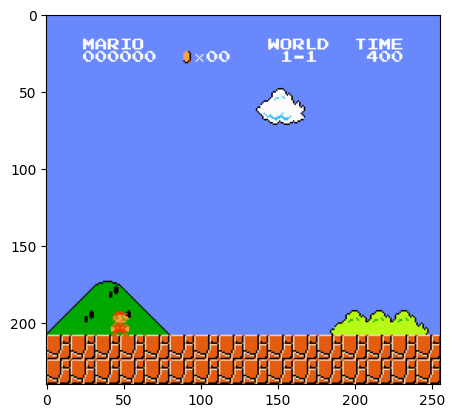

In [7]:
state = env.reset()
print(state.shape)
plt.imshow(state)

In [13]:
del env
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)
env = GrayScaleObservation(env,keep_dim=True)
#就是上面这句让这个图片变成了灰度图， 如果keep_dim=false(默认为false)，会输出(240*256),会没有第三个维度

(240, 256, 1)


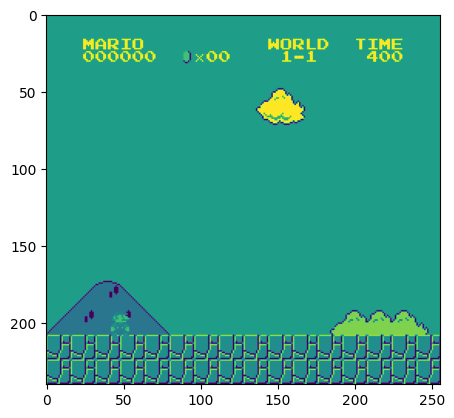

In [14]:
state = env.reset()
print(state.shape)
plt.imshow(state)

In [6]:
%tensorboard --logdir logs/PPO_104/events.out.tfevents.1721947629.DESKTOP-RFTG9F9.25040.103